In [139]:
import pandas as pd
import glob
import seaborn as sns

In [140]:
def read_file(file):
    """
    Read a file to a dict of lists.

    :param str file: Path to a sample file.
    :return: dict of lists of records
    :rtype: dict
    """
    vcf_dict = []
    #df = pd.DataFrame()
    with open(file, 'r') as invcf:
        for line in invcf:
            if line.startswith('track'):
                continue
                
    
    
            line = line.strip().split()
            CHR = line[0]
            START = line[1]
            END = line[2]
            SCORE = line[3]
            name = str(file.split('/')[-1]) 
            
            if SCORE == '2':
                continue
            
            vcf_dict.append([name, CHR, START,END, SCORE])
            
            
def read_multiple_files(path_of_files):
    """
    Read the path of vcf files to a dataframe.
    :param str file: Path to a files.
    :return: dict of lists of  records
    :rtype: dict
    """
    files = glob.glob(path_of_files+'*')
    chm13list = []
    for file in files:
        #return pd.DataFrame(read_vcf(file))
        chm13list.append(read_file(file))
    
    return (chm13list)



            


In [141]:
chm13_new = pd.read_csv('/Users/luciabazan/Downloads/AFR_Gambian_LP6005442-DNA_H10.csv')
chm13_new['#"chrom"'] = chm13_new['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new
#chm13_new['ID'].hist(bins=100, log=True)

ValueError: invalid literal for int() with base 10: 'M'

In [107]:
file = '../CHM13_SGDP/LP6005442-DNA_H10'

In [108]:
vcf_dict = []
    #df = pd.DataFrame()
with open(file, 'r') as invcf:
    for line in invcf:
        if line.startswith('track'):
            continue
        
        line = line.strip().split()
        CHR = line[0]
        START = line[1]
        END = line[2]
        SCORE = line[3]
        name = str(file.split('/')[-1]) 
            
        #if SCORE == '2':
        #    continue
            
        vcf_dict.append([name, CHR, START,END, SCORE])

In [109]:
chm13_old = pd.DataFrame(vcf_dict)

chm13_old.columns = ['SAMPLE', 'CHR', 'START', 'END', 'SCORE']
chm13_old['START'] = chm13_old['START'].astype(int)
chm13_old['END'] = chm13_old['END'].astype(int)
chm13_old['SCORE'] = chm13_old['SCORE'].astype(int)
chm13_old

,SAMPLE,CHR,START,END,SCORE
0,LP6005442-DNA_H10,CP068254.1,0,1000,998
1,LP6005442-DNA_H10,CP068254.1,1000,2228,1038
2,LP6005442-DNA_H10,CP068254.1,2228,3378,976
3,LP6005442-DNA_H10,CP068254.1,3378,4522,971
4,LP6005442-DNA_H10,CP068254.1,4522,5522,1075
...,...,...,...,...,...
1179222,LP6005442-DNA_H10,CP086569.2,62447554,62448825,22
1179223,LP6005442-DNA_H10,CP086569.2,62448825,62449825,22
1179224,LP6005442-DNA_H10,CP086569.2,62449825,62450825,24
1179225,LP6005442-DNA_H10,CP086569.2,62450825,62451825,24


In [110]:
feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')


/var/folders/05/q9klbb6d06d76xy7b8th0xf40000gn/T/ipykernel_11831/3172910145.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')


In [111]:
genbankid = list(report['GenBank-Accn'])
ch = list(report['Assigned-Molecule'])

chm13_old['CHR'] = chm13_old['CHR'].replace(genbankid, ch)
chm13_old


,SAMPLE,CHR,START,END,SCORE
0,LP6005442-DNA_H10,MT,0,1000,998
1,LP6005442-DNA_H10,MT,1000,2228,1038
2,LP6005442-DNA_H10,MT,2228,3378,976
3,LP6005442-DNA_H10,MT,3378,4522,971
4,LP6005442-DNA_H10,MT,4522,5522,1075
...,...,...,...,...,...
1179222,LP6005442-DNA_H10,Y,62447554,62448825,22
1179223,LP6005442-DNA_H10,Y,62448825,62449825,22
1179224,LP6005442-DNA_H10,Y,62449825,62450825,24
1179225,LP6005442-DNA_H10,Y,62450825,62451825,24


<AxesSubplot:>

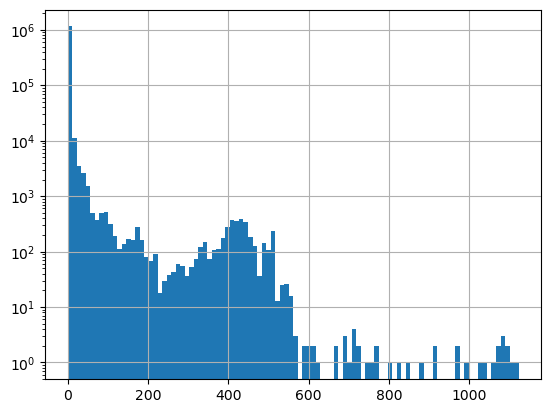

In [112]:
chm13_old['SCORE'].hist(bins=100, log=True)

<AxesSubplot:>

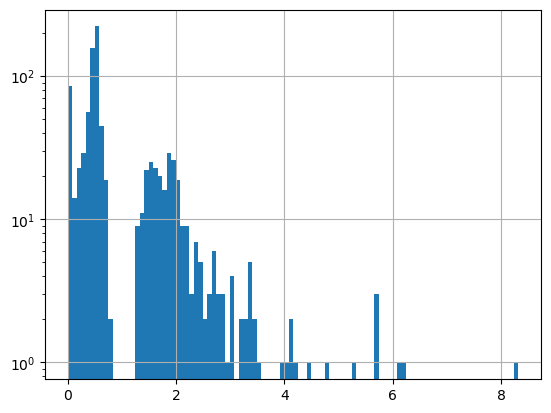

In [113]:
hg19 = pd.read_csv('../data/cnvator_data_sudmant_overlapped.csv')
hg19 = hg19.loc[hg19['Sample_ID'] == 'LP6005442-DNA_H10'] 
hg19['RD'].hist(bins=100, log=True)

In [114]:
chm13_new#['ID'].hist(bins=100, log=True)

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID
0,1,0,9083,38,0,+,0,0,"32,178,170",38.120034
1,1,9083,10803,31,0,+,0,0,"32,178,170",30.630957
2,1,10803,14487,18,0,+,0,0,"255,0,0",17.762798
3,1,14487,18731,12,0,+,0,0,"255,0,0",12.301097
4,1,18731,20013,14,0,+,0,0,"255,0,0",13.529792
...,...,...,...,...,...,...,...,...,...,...
1179222,22,51301662,51302662,35,0,+,0,0,"32,178,170",34.882811
1179223,22,51302662,51303662,31,0,+,0,0,"32,178,170",31.204205
1179224,22,51303662,51306044,32,0,+,0,0,"32,178,170",32.160766
1179225,22,51306044,51312584,41,0,+,0,0,"0,255,0",41.005122


In [115]:
hg19

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
117701,LP6005442-DNA_H10,1,228601,230900,228416,267160,1.0,deletion,0.345495,2300.0,5.111920e-05,2.872690e-08
117702,LP6005442-DNA_H10,1,232401,237900,228416,267160,3.0,duplication,1.802320,5500.0,0.000000e+00,2.980570e-04
117703,LP6005442-DNA_H10,1,471201,521500,471226,471326,1.0,deletion,0.000813,50300.0,3.168440e-12,0.000000e+00
117704,LP6005442-DNA_H10,1,1010901,1014200,1009660,1015541,1.0,deletion,0.428667,3300.0,4.829470e-11,2.567920e-23
117705,LP6005442-DNA_H10,1,4124301,4127700,4120597,4131559,1.0,deletion,0.516888,3400.0,4.687430e-11,6.018350e-31
...,...,...,...,...,...,...,...,...,...,...,...,...
118631,LP6005442-DNA_H10,X,152434801,152463400,152433588,152486500,1.0,deletion,0.501363,28600.0,5.572470e-12,2.586520e-91
118632,LP6005442-DNA_H10,X,152434801,152463400,152424320,152560119,1.0,deletion,0.501363,28600.0,5.572470e-12,2.586520e-91
118633,LP6005442-DNA_H10,X,152434801,152463400,152331188,152444252,1.0,deletion,0.501363,28600.0,5.572470e-12,2.586520e-91
118634,LP6005442-DNA_H10,X,152434801,152463400,152444252,152562356,1.0,deletion,0.501363,28600.0,5.572470e-12,2.586520e-91


<AxesSubplot:xlabel='Chr', ylabel='RD'>

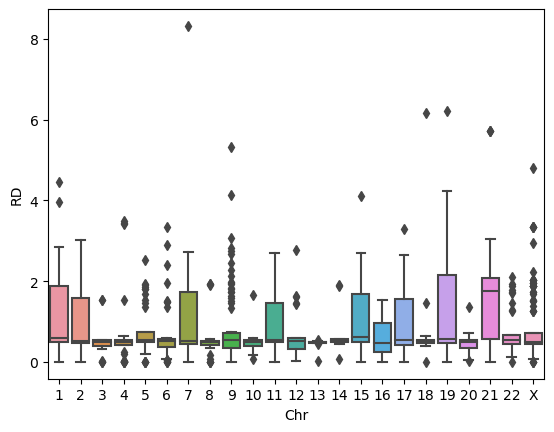

In [116]:
sns.boxplot(data=hg19, x="Chr", y="RD")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

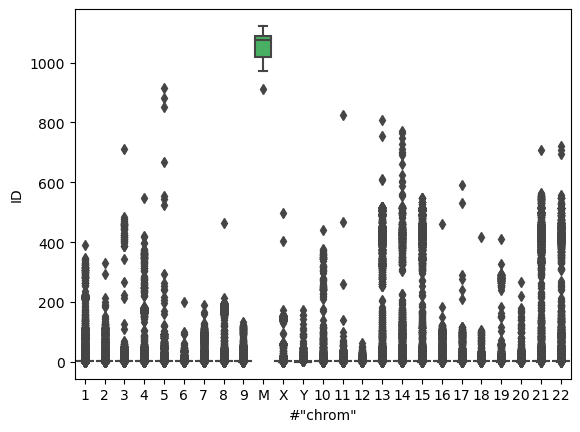

In [118]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

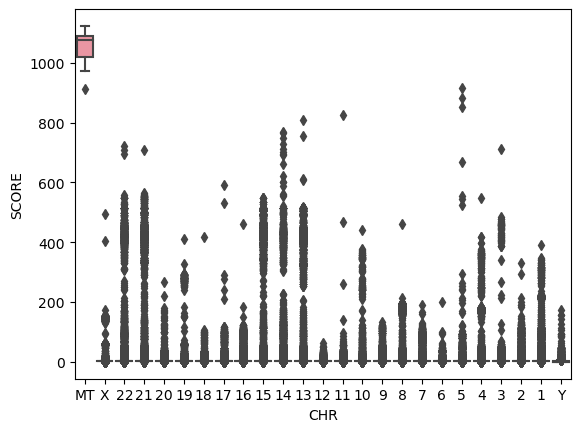

In [119]:
sns.boxplot(data=chm13_old, x='CHR', y="SCORE")

In [120]:
chm13_gene = pd.read_csv('/Users/luciabazan/Downloads/chm13_gene_regions.csv', index_col=0)
chm13_gene = chm13_gene.loc[chm13_gene['SAMPLE'] == 'LP6005442-DNA_H10'] 
chm13_gene

,SAMPLE,CHR,START,END,START_GENE,END_GENE,SCORE,TYPE
98692,LP6005442-DNA_H10,chrX,105118,116978,104496,131582,1,DELETION
98693,LP6005442-DNA_H10,chrX,105118,116978,104527,119856,1,DELETION
98694,LP6005442-DNA_H10,chrX,105118,116978,109289,117096,1,DELETION
98695,LP6005442-DNA_H10,chrX,105118,116978,109289,117096,1,DELETION
98696,LP6005442-DNA_H10,chrX,105118,116978,109428,117014,1,DELETION
...,...,...,...,...,...,...,...,...
1072076,LP6005442-DNA_H10,chr1,247954331,247967419,247965458,247971182,3,DUPLICATION
1072077,LP6005442-DNA_H10,chr1,247954331,247967419,247965458,247971182,3,DUPLICATION
1072078,LP6005442-DNA_H10,chr1,248159841,248170419,248119495,248186576,3,DUPLICATION
1072079,LP6005442-DNA_H10,chrY,148912,159019,132127,148960,3,DUPLICATION


<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

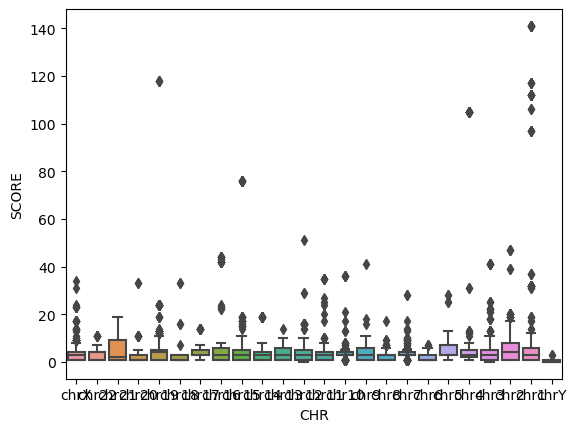

In [121]:
sns.boxplot(data=chm13_gene, x='CHR', y="SCORE")


<AxesSubplot:xlabel='Chr', ylabel='RD'>

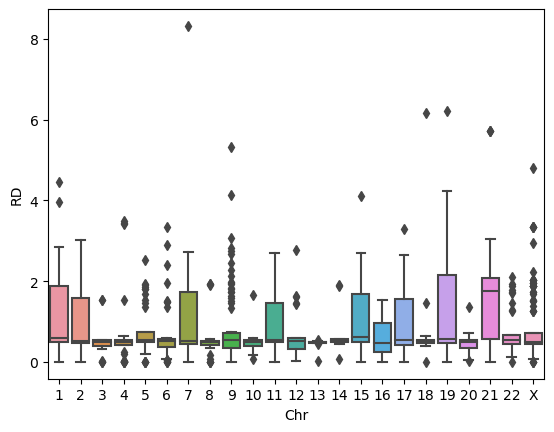

In [122]:
sns.boxplot(data=hg19, x="Chr", y="RD")

In [ ]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
gene_anotation = pd.DataFrame()
gene_anotation['CHR'] = chm13_gene_anotation['chromosome']
gene_anotation['START'] = chm13_gene_anotation['start']
gene_anotation['END'] = chm13_gene_anotation['end']
gene_anotation['CHR'] = gene_anotation['CHR'].apply(str)
#gene_anotation['CHR_2'] = chm13_gene_anotation['chromosome'] 


#### Filtering cnvs just in protein coding regions 

overlapped = []

chm13_np = chm13_new.to_numpy()
gene_anotation_np = gene_anotation.to_numpy()

for cnv in chm13_np:
    for gene in gene_anotation_np:
    
        if cnv[0] == gene[0]: #Chromosome
            # CNVS in gene regions
            if (gene[1] <= cnv[1] <= gene[2]) or (gene[1] <= cnv[2] <= gene[2]):
                #leng_dqna = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_dqna/leng_cnvnator)>0.6:
                overlapped.append([cnv[0], cnv[1], cnv[2], cnv[3], gene[1], gene[2], cnv[-1]])
                    #overlapped.append(cnv_q)
            # SUDMANT DATA CNVS in QDNASEQ CNVs(QDNASEQ bigger than SUDMANT DATA)
            
          #  if (cnv[1] <= gene[1] <= cnv[2]) or (cnv[1] <= gene[2] <= cnv[2]):
                #leng_dq/na = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_cnvnator/leng_dqna)>0.6:
              #  overlapped.append([cnv[0], gene[3], cnv[2], cnv[3], gene[1], gene[2], cnv[4], cnv[6]])
                    #overlapped.append([cnv_q, cnv_c])
                    #overlapped.append(cnv_q)



In [ ]:
chm13 = pd.DataFrame(overlapped)
chm13

In [146]:
chm13_np

array([['1', 0, 9083, ..., 0, '32,178,170', 38.120033578056784],
       ['1', 9083, 10803, ..., 0, '32,178,170', 30.63095740726978],
       ['1', 10803, 14487, ..., 0, '255,0,0', 17.762797820038397],
       ...,
       ['22', 51303662, 51306044, ..., 0, '32,178,170',
        32.16076613878968],
       ['22', 51306044, 51312584, ..., 0, '0,255,0', 41.0051216591989],
       ['22', 51312584, 51324926, ..., 0, '0,255,255', 20.88224205997194]],
      dtype=object)

In [147]:
gene_anotation_np

array([['1', 11134, 37628],
       ['1', 11134, 37628],
       ['1', 13463, 37628],
       ...,
       ['Y', 62446549, 62449100],
       ['Y', 62449384, 62451910],
       ['Y', 62449384, 62451910]], dtype=object)